# Minimum Viable Project

ReadMe

DataSet Link: https://www.kaggle.com/datasets/knightbearr/sales-product-data 

Dataset: Sales Data of the year 2019 {12 CSV Files of each month}

6 Columns: Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Order


Code:

Here, for sample only the data of March will be used {As march is 31 days and 7 months in a year are 31 days and it is neither at start or at the end of year}, once all the requirements are fulfilled, the models will be trained and tested using the whole year 2019's data.

df_raw = Actual Data

df_cleaned = Manipulated Data {Post drop columns, updating rows like address}

## Importing Libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

#### Redading the Data {March}

In [30]:
df_raw = pd.read_csv("Sales_March_2019.csv")
print(raw_DF.head())
print("\n\n\n",df_raw.tail())

  Order ID                     Product Quantity Ordered Price Each  \
0   162009                      iPhone                1        700   
1   162009    Lightning Charging Cable                1      14.95   
2   162009            Wired Headphones                2      11.99   
3   162010  Bose SoundSport Headphones                1      99.99   
4   162011      34in Ultrawide Monitor                1     379.99   

       Order Date                      Purchase Address  
0  03/28/19 20:59       942 Church St, Austin, TX 73301  
1  03/28/19 20:59       942 Church St, Austin, TX 73301  
2  03/28/19 20:59       942 Church St, Austin, TX 73301  
3  03/17/19 05:39  261 10th St, San Francisco, CA 94016  
4  03/10/19 00:01  764 13th St, San Francisco, CA 94016  



       Order ID                   Product Quantity Ordered Price Each  \
15221   176554  Lightning Charging Cable                1      14.95   
15222   176555          27in FHD Monitor                1     149.99   
15223   176

In [31]:
df_raw.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,15189,15189,15189,15189,15189,15189
unique,14550,20,8,19,11784,14247
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,35,1770,13779,1770,35,35


In [33]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15226 entries, 0 to 15225
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          15189 non-null  object
 1   Product           15189 non-null  object
 2   Quantity Ordered  15189 non-null  object
 3   Price Each        15189 non-null  object
 4   Order Date        15189 non-null  object
 5   Purchase Address  15189 non-null  object
dtypes: object(6)
memory usage: 713.8+ KB


In [32]:
df_raw["Product"].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       'Bose SoundSport Headphones', '34in Ultrawide Monitor',
       'AA Batteries (4-pack)', 'USB-C Charging Cable',
       'AAA Batteries (4-pack)', 'LG Washing Machine',
       'Apple Airpods Headphones', '27in 4K Gaming Monitor',
       'Google Phone', 'Macbook Pro Laptop', '27in FHD Monitor',
       'ThinkPad Laptop', 'Vareebadd Phone', 'Flatscreen TV',
       '20in Monitor', 'Product', 'LG Dryer', nan], dtype=object)

In [34]:
df_raw["Product"].isna().sum()

37

#### Dropping Unnecessary Columns and Rows

1. Droping the Colund "Order ID" which is not providing any information

2. Droping the rows for "Product" missing value. As with no product information can't find any trend

3. Removing the non-integers from column "Quantity Ordered"

4. Removing the non-numeric values from "Price Each"

In [79]:
df_cleaned = df_raw.drop(df_raw[["Order ID"]], axis =1)

df_cleaned = df_cleaned.dropna(subset=["Product"])

df_cleaned["Quantity Ordered"] = pd.to_numeric(df_cleaned["Quantity Ordered"], errors="coerce")
df_cleaned.dropna(subset=["Quantity Ordered"], inplace=True)

df_cleaned["Price Each"] = pd.to_numeric(df_cleaned["Price Each"], errors="coerce")
df_cleaned.dropna(subset=["Price Each"], inplace=True)

In [53]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15154 entries, 0 to 15225
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           15154 non-null  object 
 1   Quantity Ordered  15154 non-null  float64
 2   Price Each        15154 non-null  float64
 3   Order Date        15154 non-null  object 
 4   Purchase Address  15154 non-null  object 
dtypes: float64(2), object(3)
memory usage: 710.3+ KB


#### Creating three new Columns: State, Zip Code and Money Spent

Here "Address" column comprises of the whole address: It has been ssliced down to get State Code i.e."CO","AZ" and the Zip code i.e. "80301"

To understand the revenue of the particular product column "Sales" is created = Quantity ordered * Price

1. State Code

2. Zip Code

3. Sales = "Quantity Ordered" * "Price Each"

In [80]:
# extract the state abbreviation
df_cleaned["State"] = df_cleaned["Purchase Address"].str[-9:-6]

# extract the zip code
df_cleaned["Zip Code"] = df_cleaned["Purchase Address"].str[-5:]
df_cleaned

# Money Spent Column
df_cleaned["Sales"] = df_cleaned["Quantity Ordered"] * df_cleaned["Price Each"]

df_cleaned

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,State,Zip Code,Sales
0,iPhone,1.0,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",TX,73301,700.00
1,Lightning Charging Cable,1.0,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",TX,73301,14.95
2,Wired Headphones,2.0,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",TX,73301,23.98
3,Bose SoundSport Headphones,1.0,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",CA,94016,99.99
4,34in Ultrawide Monitor,1.0,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",CA,94016,379.99
...,...,...,...,...,...,...,...,...
15221,Lightning Charging Cable,1.0,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016",CA,94016,14.95
15222,27in FHD Monitor,1.0,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016",CA,94016,149.99
15223,AAA Batteries (4-pack),3.0,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001",CA,90001,8.97
15224,iPhone,1.0,700.00,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",CA,94016,700.00


#### Working with "Order Date" column to get more information like Day of the week, month, year

In [82]:
# Convert Order Date column to a datetime object
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], format='%m/%d/%y %H:%M')

# Extract day, month, and year from Order Date
df_cleaned['Day'] = df_cleaned['Order Date'].dt.day
df_cleaned['Month'] = df_cleaned['Order Date'].dt.month
df_cleaned['Year'] = df_cleaned['Order Date'].dt.year

# Extract day of the week from Order Date
df_cleaned['DayOfWeek'] = df_cleaned['Order Date'].dt.dayofweek

# Add the name of the day
df_cleaned['DayName'] = df_cleaned['Order Date'].dt.day_name()

df_cleaned

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,State,Zip Code,Sales,Day,Month,Year,DayOfWeek,DayName
0,iPhone,1.0,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",TX,73301,700.00,28,3,2019,3,Thursday
1,Lightning Charging Cable,1.0,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",TX,73301,14.95,28,3,2019,3,Thursday
2,Wired Headphones,2.0,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",TX,73301,23.98,28,3,2019,3,Thursday
3,Bose SoundSport Headphones,1.0,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",CA,94016,99.99,17,3,2019,6,Sunday
4,34in Ultrawide Monitor,1.0,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",CA,94016,379.99,10,3,2019,6,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15221,Lightning Charging Cable,1.0,14.95,2019-03-24 11:14:00,"672 12th St, San Francisco, CA 94016",CA,94016,14.95,24,3,2019,6,Sunday
15222,27in FHD Monitor,1.0,149.99,2019-03-22 20:27:00,"42 4th St, San Francisco, CA 94016",CA,94016,149.99,22,3,2019,4,Friday
15223,AAA Batteries (4-pack),3.0,2.99,2019-03-14 10:29:00,"871 7th St, Los Angeles, CA 90001",CA,90001,8.97,14,3,2019,3,Thursday
15224,iPhone,1.0,700.00,2019-03-30 12:32:00,"83 Washington St, San Francisco, CA 94016",CA,94016,700.00,30,3,2019,5,Saturday


## EDA

### Total Sell by each Product

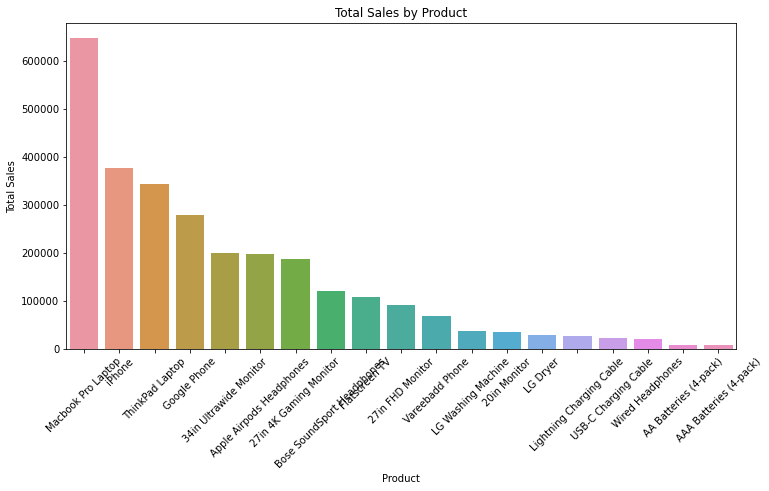

In [83]:
product_sales = df_cleaned.groupby('Product')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


### Quantity ordered for each product

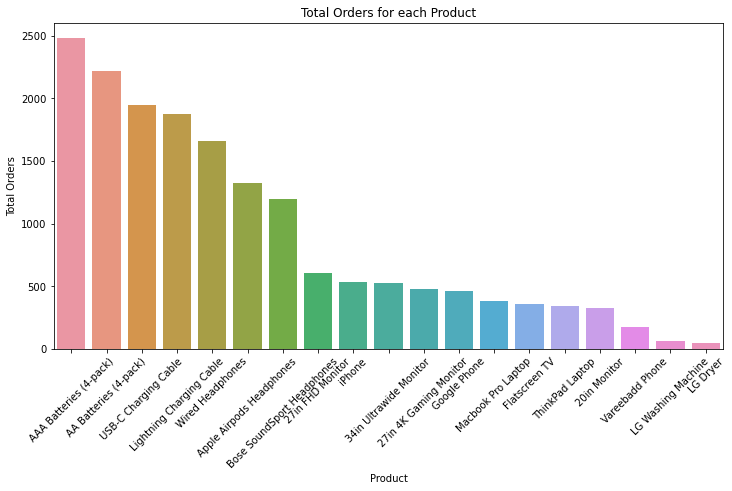

In [84]:
product_order = df_cleaned.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=product_order.index, y=product_order.values)
plt.title('Total Orders for each Product')
plt.xlabel('Product')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()

### Number of Orders by Day in a week

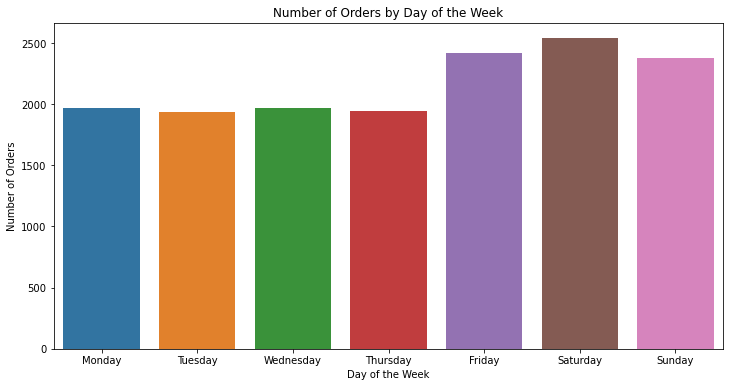

In [91]:
# Count the number of orders for each day of the week
weekday_orders = df_cleaned['DayOfWeek'].value_counts().sort_index()

# Plot the number of orders by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x=weekday_orders.index, y=weekday_orders.values)
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


### Number of Orders hour in the Day

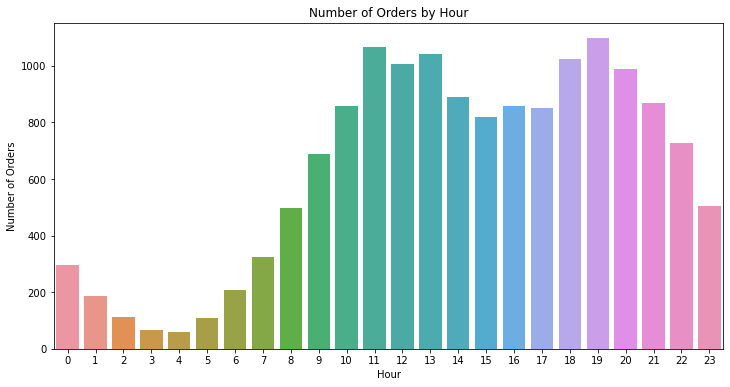

In [87]:
# Extract the hour from the 'Order Date' column
df_cleaned['Hour'] = df_cleaned['Order Date'].dt.hour

# Count the number of orders in each hour
hourly_orders = df_cleaned['Hour'].value_counts().sort_index()

# Plot the hourly distribution of orders
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_orders.index, y=hourly_orders.values)
plt.title('Number of Orders by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()


### Grouping Daily Sales Product wise

In [93]:
daily_sales = df_cleaned.groupby(['Product', pd.Grouper(key='Order Date', freq='D')]).agg({'Sales': 'sum'}).reset_index()
daily_sales

,Product,Order Date,Sales
0,20in Monitor,2019-03-01,989.91
1,20in Monitor,2019-03-02,1319.88
2,20in Monitor,2019-03-03,1209.89
3,20in Monitor,2019-03-04,1869.83
4,20in Monitor,2019-03-05,1209.89
...,...,...,...
588,iPhone,2019-03-27,18900.00
589,iPhone,2019-03-28,11200.00
590,iPhone,2019-03-29,11900.00
591,iPhone,2019-03-30,11200.00


In [96]:
# One column per product
pivot_sales = daily_sales.pivot_table(index='Order Date', columns='Product', values='Sales', fill_value=0)
pivot_sales

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Order Date,,,,,,,,,,,,,,,,,,,
2019-03-01,989.91,4289.89,2849.81,6079.84,253.44,167.44,5250,3199.68,3000,10200,0,600,956.80,20400,14999.85,920.15,1200,479.60,11900
2019-03-02,1319.88,5069.87,3749.75,4939.87,257.28,248.17,5850,3599.64,4200,10200,600,1800,911.95,17000,11999.88,956.00,2800,707.41,16100
2019-03-03,1209.89,4679.88,2849.81,6079.84,257.28,224.25,5850,3799.62,3600,9600,0,600,971.75,22100,8999.91,657.25,2000,839.30,11200
2019-03-04,1869.83,7409.81,3599.76,3419.91,288.00,143.52,6000,4499.55,5400,11400,1800,1200,702.65,10200,16999.83,752.85,2400,599.50,9800
2019-03-05,1209.89,6239.84,3449.77,5699.85,264.96,322.92,6900,3899.61,3000,9600,600,600,941.85,30600,13999.86,609.45,3200,671.44,8400
2019-03-06,1319.88,3509.91,2999.80,5319.86,318.72,230.23,6600,3899.61,3000,10200,1200,1200,717.60,17000,10999.89,705.05,3200,575.52,13300
2019-03-07,1539.86,8579.78,2999.80,6079.84,303.36,167.44,5700,2999.70,2700,8400,1200,3000,1091.35,23800,11999.88,872.35,1600,731.39,11900
2019-03-08,989.91,5069.87,4049.73,3039.92,276.48,257.14,5850,4299.57,2400,9000,1200,1800,807.30,23800,12999.87,824.55,2000,551.54,12600
2019-03-09,1319.88,7019.82,4199.72,7219.81,203.52,230.23,6000,4499.55,4200,6600,600,600,837.20,28900,4999.95,884.30,1600,731.39,14000


### Lagged Feature

In [97]:
def create_lagged_features(df, lag_range):
    df_lagged = df.copy()
    for i in lag_range:
        df_lagged[f'lag_{i}'] = df_lagged.shift(i)
    return df_lagged


In [98]:
lag_range = range(1, 8) # You can adjust this range based on your analysis
pivot_sales_lagged = pivot_sales.apply(lambda x: create_lagged_features(x, lag_range)).dropna()


In [99]:
pivot_sales_lagged

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Order Date,,,,,,,,,,,,,,,,,,,
2019-03-01 00:00:00,989.91,4289.89,2849.81,6079.84,253.44,167.44,5250,3199.68,3000,10200,0,600,956.8,20400,14999.85,920.15,1200,479.6,11900
2019-03-02 00:00:00,1319.88,5069.87,3749.75,4939.87,257.28,248.17,5850,3599.64,4200,10200,600,1800,911.95,17000,11999.88,956.0,2800,707.41,16100
2019-03-03 00:00:00,1209.89,4679.88,2849.81,6079.84,257.28,224.25,5850,3799.62,3600,9600,0,600,971.75,22100,8999.91,657.25,2000,839.3,11200
2019-03-04 00:00:00,1869.83,7409.81,3599.76,3419.91,288.0,143.52,6000,4499.55,5400,11400,1800,1200,702.65,10200,16999.83,752.85,2400,599.5,9800
2019-03-05 00:00:00,1209.89,6239.84,3449.77,5699.85,264.96,322.92,6900,3899.61,3000,9600,600,600,941.85,30600,13999.86,609.45,3200,671.44,8400
2019-03-06 00:00:00,1319.88,3509.91,2999.8,5319.86,318.72,230.23,6600,3899.61,3000,10200,1200,1200,717.6,17000,10999.89,705.05,3200,575.52,13300
2019-03-07 00:00:00,1539.86,8579.78,2999.8,6079.84,303.36,167.44,5700,2999.7,2700,8400,1200,3000,1091.35,23800,11999.88,872.35,1600,731.39,11900
2019-03-08 00:00:00,989.91,5069.87,4049.73,3039.92,276.48,257.14,5850,4299.57,2400,9000,1200,1800,807.3,23800,12999.87,824.55,2000,551.54,12600
2019-03-09 00:00:00,1319.88,7019.82,4199.72,7219.81,203.52,230.23,6000,4499.55,4200,6600,600,600,837.2,28900,4999.95,884.3,1600,731.39,14000


### Splitting Dataset into Training and Testing

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pivot_sales_lagged.drop(columns=pivot_sales.columns), pivot_sales_lagged[pivot_sales.columns], test_size=0.2, shuffle=False)
